# Linear regression example

This is an example of doing linear regression from scratch. Let us assume we have some house prices (hprice) together with the sizes of these houses (hsize).  The values are specified in the code below, which we also display in a simple plot. 


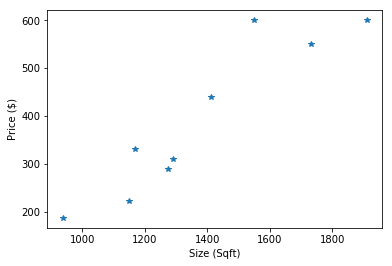

In [1]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

hsize=array([937, 1150, 1170, 1290, 1275, 1410, 1550, 1730, 1910]);
price=array([187,  222,  330,  310,  290,  440,  600,  550,  600]);
    
plot(hsize,price,'*')
xlabel('Size (Sqft)')
ylabel('Price ($)')
show()

## The regression code

We now write the regression code. First we set the starting values for the parameters a and b, and also the update (learning) rate alpha. We then do 5000 iterations to update the parameters a and b with the gradient descent rule.   


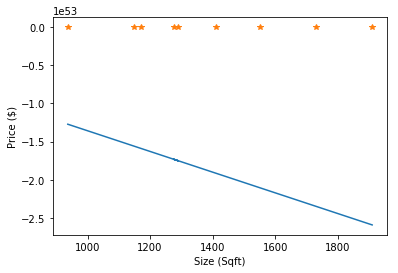

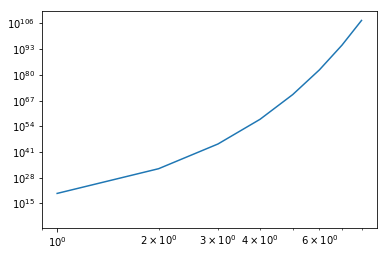

In [2]:
a=array([-1]); b=array([-1]); L=array([])
alpha=0.1

for iter in range(10-1):
    y=a[-1]*hsize+b[-1]
    a=append(a,a[-1]-alpha*sum((y-price)*hsize))
    b=append(b,b[-1]-alpha*sum(y-price))
    L=append(L,sum((y-price)**2))
    
plot(hsize,y)
plot(hsize,price,'*')
xlabel('Size (Sqft)')
ylabel('Price ($)')
show()
loglog(L)
show()

This does not look right. It is worth looking at the scale and see that these are very large numbers. So we need to make the learning rate much smaller while also increasing the number of iterations:



So lets try this again with a much smaller learning rate

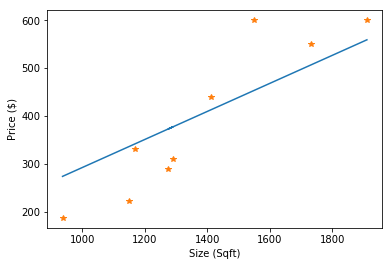

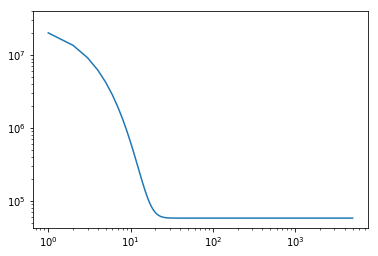

In [3]:
a=array([-1]); b=array([-1]); L=array([])
alpha=0.00000001

for iter in range(5000-1):
    y=a[-1]*hsize+b[-1]
    a=append(a,a[-1]-alpha*sum((y-price)*hsize))
    b=append(b,b[-1]-alpha*sum(y-price))
    L=append(L,sum((y-price)**2))
    
plot(hsize,y)
plot(hsize,price,'*')
xlabel('Size (Sqft)')
ylabel('Price ($)')
show()
loglog(L)
show()


This looks better but is still not quite right. The solution seems to be converging in the right direction but very slowley. Choosing the right hypermarameters, the learing rate and the number of iterations in our example, can be a chellenging tasks. 

## Plotting loss surface and learning path

It is very illuminating to plot the loss surface. For this we use a 3d plotting routine and then view it from above. We also include the path that is taken by the learning algorithm.

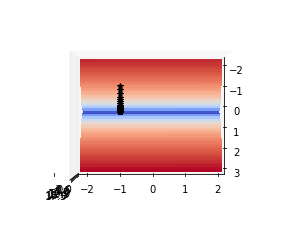

In [5]:
ax = figure().gca(projection='3d')

# Make data.
a0 = arange(-2, 3, 0.1)
b0 = arange(-2, 2, 0.1)
a0, b0 = meshgrid(a0, b0)

L=zeros(a0.shape)
for i in range(size(hsize)):
    L=L+(a0*hsize[i]+b0-price[i])**2
    
# Plot the surface.

surf = ax.plot_surface(a0, b0, log(L), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.yaxis.set_ticks(np.arange(-3, 3, 1))
ax.view_init(90, 0)
ax.plot(a,b,'k*-')
ax.grid(False)
gca().set_aspect('equal', adjustable='box')

show()


## Normalization

The problem is that the error surface is steep in some directions but can be very shallow in other direction. Adjusting the learning rate appropriately is hence chellenging. One important trick is to normalize the data so that the numerical ranges are the same in all directions.  

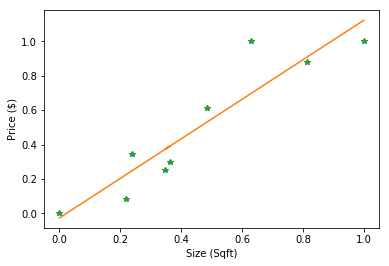

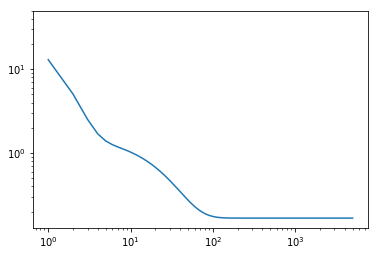

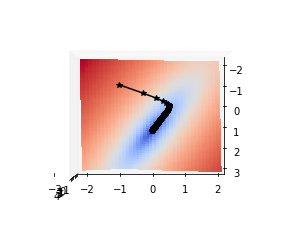

In [6]:
hsize=(hsize-min(hsize))/(max(hsize)-min(hsize))
price=(price-min(price))/(max(price)-min(price))

plot(hsize,price,'*')
xlabel('Size (Sqft)')
ylabel('Price ($)')

a=array([-1]); b=array([-1]); L=array([])
alpha=0.04

for iter in range(5000-1):
    y=a[-1]*hsize+b[-1]
    a=append(a,a[-1]-alpha*sum((y-price)*hsize))
    b=append(b,b[-1]-alpha*sum(y-price))
    L=append(L,sum((y-price)**2))
    
plot(hsize,y)
plot(hsize,price,'*')
xlabel('Size (Sqft)')
ylabel('Price ($)')
show()
loglog(L)
show()

ax = figure().gca(projection='3d')

# Make data.
a0 = arange(-2, 3, 0.1)
b0 = arange(-2, 2, 0.1)
a0, b0 = meshgrid(a0, b0)

L=zeros(a0.shape)
for i in range(size(hsize)):
    L=L+(a0*hsize[i]+b0-price[i])**2
    
# Plot the surface.

surf = ax.plot_surface(a0, b0, log(L), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.yaxis.set_ticks(np.arange(-3, 3, 1))
ax.view_init(90, 0)
ax.plot(a,b,'k*-')
ax.grid(False)
gca().set_aspect('equal', adjustable='box')

show()
